In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
%matplotlib inline

def group_info(group1, group2):
    data = pd.DataFrame({'group 1': group1, 'group 2': group2})
    print(data.head())
    print(data.describe())   

## t-test for two unpaired groups

In [25]:
group1 = np.random.normal(loc=50,scale=10,size=100)
group2 = np.random.normal(loc=50,scale=10,size=100)
group_info(group1, group2)
stats.ttest_ind(a=group1, b=group2)

     group 1    group 2
0  45.097190  56.125865
1  38.968336  35.010715
2  68.285929  33.486164
3  53.291146  43.450686
4  55.928296  43.459618
          group 1     group 2
count  100.000000  100.000000
mean    50.423771   48.373274
std     10.738778    9.907060
min     29.000402   23.847196
25%     42.174263   41.895124
50%     50.361539   49.823402
75%     57.690960   54.312847
max     74.474707   74.369799


Ttest_indResult(statistic=1.4034261617588917, pvalue=0.16205612088817262)

In [26]:
group1 = np.random.normal(loc=50,scale=10,size=100)
# try loc=50, loc=55, loc=60
group2 = np.random.normal(loc=55,scale=10,size=100)
group_info(group1, group2)
stats.ttest_ind(a=group1, b=group2)

     group 1    group 2
0  67.340610  55.411692
1  60.690471  70.945917
2  61.925956  39.472541
3  51.536119  45.838757
4  40.574786  54.892478
          group 1     group 2
count  100.000000  100.000000
mean    50.438547   54.901758
std     10.509182   11.108427
min     25.386899   26.423300
25%     42.406898   48.768508
50%     50.789796   53.490163
75%     57.256941   60.634073
max     69.612404   82.727404


Ttest_indResult(statistic=-2.91869004632693, pvalue=0.003921897279254376)

## t-test for two paired groups

In [27]:
group1 = np.random.normal(loc=10,scale=2,size=100)
group2 = group1 + np.random.normal(0,1,size=100)
group_info(group1, group2)
stats.ttest_rel(a=group1, b=group2)

     group 1    group 2
0  11.981865  12.412059
1  10.493288  11.015046
2   8.693839   6.528605
3   9.387799   9.773439
4  10.736378  10.638684
          group 1     group 2
count  100.000000  100.000000
mean     9.954818    9.973082
std      1.883601    2.202938
min      5.101642    4.899768
25%      8.688538    8.611521
50%     10.046318    9.881663
75%     11.186128   11.170853
max     14.446113   15.652732


Ttest_relResult(statistic=-0.1879127394473305, pvalue=0.8513296786571112)

In [28]:
group1 = np.random.normal(loc=10,scale=2,size=100)
# try normal(-1,1), normal(-5,1), normal(1,1)
group2 = group1 + np.random.normal(-1,1,size=100)
group_info(group1, group2)
stats.ttest_rel(a=group1, b=group2)

     group 1    group 2
0   7.772143   6.608539
1   8.540167   5.887804
2  11.137618  10.298958
3   9.726002   9.325547
4  11.000119   9.651654
          group 1     group 2
count  100.000000  100.000000
mean    10.145045    9.100135
std      2.010642    2.301237
min      6.093425    4.303252
25%      8.439998    7.087400
50%     10.272384    9.355621
75%     11.645920   10.916121
max     14.849557   13.834168


Ttest_relResult(statistic=10.59533024565102, pvalue=5.520641590676399e-18)

# Party identification of women and men
Please note that the numbers given here and the numbers given in the slides (including X2 statistic) are slightly different.


In [29]:
observed = pd.DataFrame({'male': [173, 254, 134, 173, 147, 151, 113],
                       'female': [225, 438, 167, 180, 138, 196, 165]},
                   index=[1,2,3,4,5,6,7])

print('female:')
print(observed.female/observed.female.sum())
print('male:')
print(observed.male/observed.male.sum())

party = observed.male+observed.female
overall = party/party.sum()
print('overall:')
print(overall)

expected = pd.DataFrame({'male': np.rint(overall*observed.male.sum()),
                         'female': np.rint(overall*observed.female.sum())},
                   index=[1,2,3,4,5,6,7])
print('observed:')
print(observed)
print('expected:')
print(expected)

#manually compute statistic
s = (observed-expected)**2/expected
st = s.sum().sum() 
#manually compute p-value
pvalue = (1-stats.chi2.cdf(st, df=6))
print(f'manually computed statistic: {s.sum().sum()}, p-value: {pvalue}')
st, pvalue = stats.chisquare(f_obs=observed, f_exp=expected, axis=None, ddof=7)
print(f'Test result: statistic={st}, p-value={pvalue}')

female:
1    0.149105
2    0.290258
3    0.110669
4    0.119284
5    0.091451
6    0.129887
7    0.109344
Name: female, dtype: float64
male:
1    0.151092
2    0.221834
3    0.117031
4    0.151092
5    0.128384
6    0.131878
7    0.098690
Name: male, dtype: float64
overall:
1    0.149962
2    0.260739
3    0.113414
4    0.133007
5    0.107385
6    0.130746
7    0.104748
dtype: float64
observed:
   male  female
1   173     225
2   254     438
3   134     167
4   173     180
5   147     138
6   151     196
7   113     165
expected:
    male  female
1  172.0   226.0
2  299.0   393.0
3  130.0   171.0
4  152.0   201.0
5  123.0   162.0
6  150.0   197.0
7  120.0   158.0
manually computed statistic: 26.216160662803915, p-value: 0.00020291558350571393
Test result: statistic=26.216160662803915, p-value=0.00020291558350572366


# McNemar test

Paired samples:  1319 schoolchildren were questioned on the prevalence of symptoms of severe cold at the age of 12 and again at the age of 14 years. At age 12, 356 (27%) children were reported to have severe colds in the past 12 months compared to 468 (35.5%) at age 14.

In [30]:
import statsmodels.stats.contingency_tables as ct
ctable = [[212, 144], # a,b
        [256, 707]]  # c,d

# use exact=True if (b+c)<25
result = ct.mcnemar(table=ctable, exact=False, correction=False)
print(f'McNemar Result: statistic={result.statistic}, p-value={result.pvalue}')

McNemar Result: statistic=31.36, p-value=2.143518051662182e-08


## ANOVA Example in Lecture Notes
The young bank manager struggles with finding the best way to staff her branch. She knows that she needs to have more tellers on Fridays than on other days, but she is trying to find if the need for tellers is constant across the rest of the week. She collects data for the number of transactions each day for two months.

* Mondays: 276, 323, 298, 256, 277, 309, 312, 265, 311
* Tuesdays: 243, 279, 301, 285, 274, 243, 228, 298, 255
* Wednesdays: 288, 292, 310, 267, 243, 293, 255, 273
* Thursdays: 254, 279, 241, 227, 278, 276, 256, 262

She tests the null hypothesis:

H0: all day means are the same.

and decides to use alpha=0.05


In [12]:
alpha = 0.05

mondays = [276, 323, 298, 256, 277, 309, 312, 265, 311]
tuesdays = [243, 279, 301, 285, 274, 243, 228, 298, 255]
wednesdays = [288, 292, 310, 267, 243, 293, 255, 273]
thursdays = [254, 279, 241, 227, 278, 276, 256, 262]

fscore, pvalue = stats.f_oneway(mondays, tuesdays, wednesdays, thursdays)

print("f-score = {}, p-value = {}".format(fscore, pvalue))

if pvalue<alpha:
    print("Reject the null hypothesis!\nDay means are not the same.")
else:
    print("Failed to reject the null hypothesis!")

f-score = 3.2426481515668395, p-value = 0.03573533519950801
Reject the null hypothesis!
Day means are not the same.


## One-Way ANOVA Example
Generate n random numbers (normal dist) for each of four groups.

If group means are different we should be able to reject the null hypothesis.

Otherwise, we fail to reject the null hypothesis.

Try different means/variances for group 4

In [32]:
n = 25 # try 5, 10, 25, 100
mu = 50
sigma = 5
group1 = np.random.normal(loc=mu, scale=sigma, size=n)
group2 = np.random.normal(loc=mu, scale=sigma, size=n) 
group3 = np.random.normal(loc=mu, scale=sigma, size=n) 
# for the following, try loc=mu and loc=mu*1.1 
group4 = np.random.normal(loc=mu*1.1, scale=sigma, size=n)

fscore, pvalue = stats.f_oneway(group1, group2, group3, group4)

print("f-score = {}, p-value = {}".format(fscore, pvalue))

if pvalue<alpha:
    print("Reject the null hypothesis!\nGroup means are not the same.")
else:
    print("Failed to reject the null hypothesis!")

f-score = 0.5286428851991223, p-value = 0.6636788785302197
Failed to reject the null hypothesis!


## Type I Error
### Pairwise Test versus Anova 

Generate 3 uniformly distributed samples each having n elements and use the same mu and sigma for all groups!

We have to reject Ho because all have the same means.

Try to reject by ANOVA and pairwise t-test

What is the Type I Error in both cases? (repeat the test for M times and find ratio of falsely rejected!)

In [17]:
def reject_anova(alpha, group1, group2, group3):
    fscore, pvalue = stats.f_oneway(group1, group2, group3)
    return pvalue<=alpha

def reject_pairwise(alpha, group1, group2, group3):
    ts, pvalue = stats.ttest_ind(a=group1, b=group2)
    if pvalue<=alpha:
        return True
    ts, pvalue = stats.ttest_ind(a=group1, b=group3)
    if pvalue<=alpha:
        return True
    ts, pvalue = stats.ttest_ind(a=group2, b=group3)
    if pvalue<=alpha:
        return True
    return False

M = 1000
n = 50
mu = 50
sigma = 5

alpha = 0.05
rejected_anova = 0
rejected_pairwise = 0
for m in range(M):
    group1 = np.random.normal(loc=mu, scale=sigma, size=n)
    group2 = np.random.normal(loc=mu, scale=sigma, size=n) 
    group3 = np.random.normal(loc=mu, scale=sigma, size=n)

    if reject_anova(alpha, group1, group2, group3):
        rejected_anova += 1
    if reject_pairwise(alpha, group1, group2, group3):
        rejected_pairwise += 1

print('alpha: ', alpha)
print('Reject ratio for ANOVA: ', rejected_anova/M)
print('Reject ratio for pairwise t-test:', rejected_pairwise/M)
print('Expected Type I error for pairwise t-test', 1-(1-alpha)**3)

alpha:  0.05
Reject ratio for ANOVA:  0.049
Reject ratio for pairwise t-test: 0.117
Expected Type I error for pairwise t-test 0.1426250000000001


## Do we reject something that must be rejected??

Note that group1's mean is different

In [34]:
rejected_anova = 0
rejected_pairwise = 0
for m in range(M):
    group1 = np.random.normal(loc=55, scale=5, size=n) 
    group2 = np.random.normal(loc=50, scale=5, size=n)
    group3 = np.random.normal(loc=50, scale=5, size=n)
    if reject_anova(alpha, group1, group2, group3):
        rejected_anova += 1
    if reject_pairwise(alpha, group1, group2, group3):
        rejected_pairwise += 1
        
print(f'Reject ratios for ANOVA: {rejected_anova/M} Pairwise t-test:{rejected_pairwise/M}')

Reject ratios for ANOVA: 0.955 Pairwise t-test:0.9798


### try ANOVA with uniformly distributed data (not normal!)


In [19]:
n = 25
M = 10000
mu = 5
alpha = 0.05
rejected = 0
for i in range(M):
    group1 = np.random.uniform(0,2*mu,n)
    group2 = np.random.uniform(0,2*mu,n) 
    # for the following, you may also try (0,3*mu,n)
    group3 = np.random.uniform(0,2*mu,n) 
    fscore, pvalue = stats.f_oneway(group1, group2, group3)    
    if pvalue<=alpha:
        rejected += 1

print(f'Reject ratio = {rejected/M}')

Reject ratio = 0.0474


### Apply Mann-Whitney-U test applied to two unpaired groups
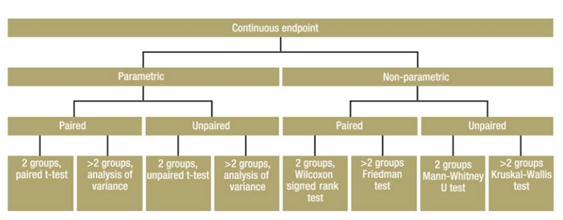


In [20]:
n = 25
mu = 5
group1 = np.random.uniform(0,2*mu, size=n)
# try (0,2*mu,size=n) and (0,3*mu,size=n)
group2 = np.random.uniform(0,2*mu, size=n) 
stats.mannwhitneyu(x=group1, y=group2)

MannwhitneyuResult(statistic=274.0, pvalue=0.23046744292739907)

### Apply Kruskal-Wallis test applied to three unpaired groups


In [21]:
n = 25
mu = 5
group1 = np.random.uniform(0,2*mu, size=n)
group2 = np.random.uniform(0,2*mu, size=n) 
# for the following, try high=2*mu and high=mu
group3 = np.random.uniform(0,2*mu, size=n) 
stats.kruskal(group1, group2, group3)    


KruskalResult(statistic=0.5200842105263064, pvalue=0.7710191211571125)

### Apply Wilcoxon signed rank test to two paired groups

In [22]:
n = 25
mu = 5
group1 = np.random.uniform(0,2*mu, size=n)
#try loc=0 and loc=1
group2 = group1 + np.random.normal(loc=0,scale=1,size=n)
stats.wilcoxon(group1, group2)

WilcoxonResult(statistic=115.0, pvalue=0.20993918180465698)

### Apply Friedman test to three paired groups

In [23]:
n = 25
mu = 5
group1 = np.random.uniform(0,2*mu, size=n)
group2 = group1 + np.random.normal(loc=0, scale=1, size=n)
#try loc=0 and loc=1
group3 = group1 + np.random.normal(loc=0, scale=1, size=n)
stats.friedmanchisquare(group1, group2, group3)

FriedmanchisquareResult(statistic=2.480000000000018, pvalue=0.289384217939048)

# Covariance

In [19]:
x = np.array([2,3,5,4,6])
y = np.array([5,8,10,11,14])
print('cov_x_y = cov_y_x =', (x*y).sum()/5-x.mean()*y.mean())
print('cov_x_x = ', x.std()**2)
print('cov_y_y = ', y.std()**2)
np.cov([2,3,5,4,6],[5,8,10,11,14], bias=True) 

cov_x_y = cov_y_x = 4.0
cov_x_x =  2.0
cov_y_y =  9.04


array([[ 2.  ,  4.  ],
       [ 4.  ,  9.04]])

# Correlations

PearsonrResult:  (0.29121508494806125, 0.0032871015856650349)
SpearmanrResult(correlation=0.27968796879687963, pvalue=0.0048295202720496696)
KendalltauResult(correlation=0.19434343434343437, pvalue=0.004170772645327352)


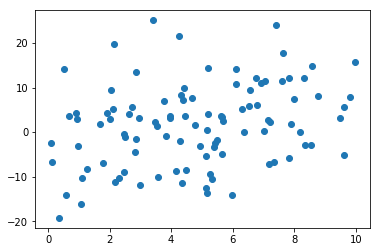

In [31]:
def apply_all_r(x,y):
    print('PearsonrResult: ',stats.pearsonr(x,y))
    print(stats.spearmanr(x,y))
    print(stats.kendalltau(x,y))

x = np.random.uniform(0,10,100)
y = 0.1*x*x+np.random.normal(0,10, size=100)
apply_all_r(x,y)
plt.scatter(x,y)


### positive linear correlation

pearson's r (0.83129271194868504, 9.7326980151013232e-27)
SpearmanrResult(correlation=0.84142814281428124, pvalue=6.0546942442863213e-28)
KendalltauResult(correlation=0.64161616161616175, pvalue=3.1239543611954529e-21)


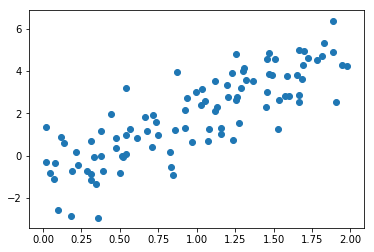

In [20]:
n = 100
x = np.random.uniform(0, 2, n)
y = 3*x - 1 + np.random.normal(0,1,n)
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))

pearson's r (0.99822988353710518, 6.1615562302531299e-122)
SpearmanrResult(correlation=0.99740774077407734, pvalue=7.9329830697478694e-114)
KendalltauResult(correlation=0.96767676767676769, pvalue=3.6066319632580837e-46)


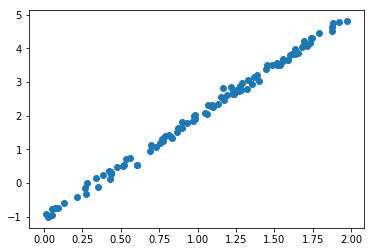

In [21]:
n = 100
x = np.random.uniform(0, 2, n)
y = 3*x - 1 + np.random.normal(0,0.1,n)
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))

### negative linear correlation

pearson's r (-0.88271878846138707, 6.529134147394367e-34)
SpearmanrResult(correlation=-0.88656465646564642, pvalue=1.402549467432803e-34)
KendalltauResult(correlation=-0.70747474747474759, pvalue=1.821011776651678e-25)


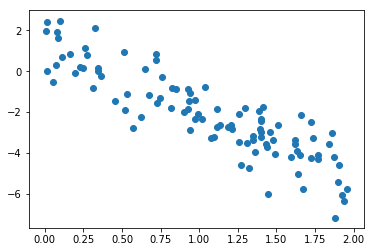

In [22]:
n = 100
x = np.random.uniform(0, 2, n)
y = - 3*x + 1 + np.random.normal(0,1,n)
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))

pearson's r (-0.99810507608718813, 1.7310964030637238e-120)
SpearmanrResult(correlation=-0.9973717371737173, pvalue=1.5581028555773941e-113)
KendalltauResult(correlation=-0.96323232323232344, pvalue=9.2056854696872367e-46)


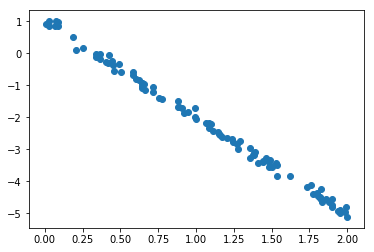

In [23]:
n = 100
x = np.random.uniform(0, 2, n)
y = - 3*x + 1 + np.random.normal(0,0.1,n)
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))

### no linear correlation

pearson's r (-0.038124209130945969, 0.70648137525949062)
SpearmanrResult(correlation=-0.03806780678067806, pvalue=0.70689581970970639)
KendalltauResult(correlation=-0.024646464646464649, pvalue=0.71635820028060104)


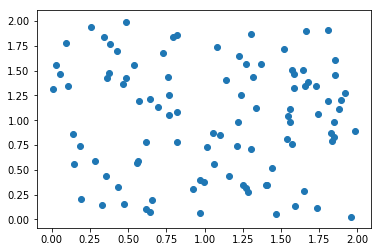

In [24]:
n = 100
x = np.random.uniform(0, 2, n)
y = np.random.uniform(0, 2, n)
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))

pearson's r (-0.038333810026925458, 0.70494197953604121)
SpearmanrResult(correlation=0.037167716771677163, pvalue=0.71352118410606558)
KendalltauResult(correlation=0.062626262626262641, pvalue=0.35589454600348003)


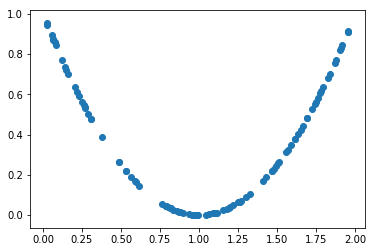

In [25]:
n = 100
x = np.random.uniform(0, 2, n)
y = (x-1)**2 
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))

### monotonic relationship

pearson's r (0.92103120118628323, 6.4369347088606613e-42)
SpearmanrResult(correlation=0.99999999999999989, pvalue=0.0)
KendalltauResult(correlation=1.0, pvalue=3.4802811924582543e-49)


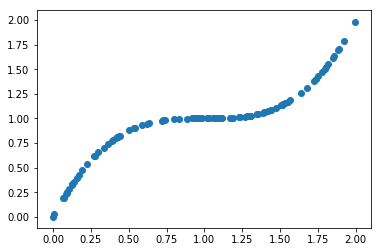

In [26]:
n = 100
x = np.random.uniform(0, 2, n)
y = (x-1)**3 + 1
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))

pearson's r (-0.65072113628376549, 2.3310447602400688e-13)
SpearmanrResult(correlation=-0.99998799872786459, pvalue=3.4490798598571626e-228)
KendalltauResult(correlation=-0.99969692376936892, pvalue=3.9583834682950392e-49)


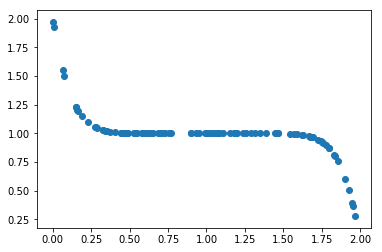

In [27]:
n = 100
x = np.random.uniform(0, 2, n)
y = (1-x)**9 + 1
plt.scatter(x,y)
print('pearson\'s r', stats.pearsonr(x,y))
print(stats.spearmanr(x,y))
print(stats.kendalltau(x,y))